In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
#dataframe = pd.read_csv(r"indicadoresTipoPalabra_suma_CLASS.csv")
#dataframe = pd.read_csv(r"indicadoresTipoPalabra_umbral1_CLASS.csv")
dataframe = pd.read_csv(r"indicadoresTipoPalabra_umbral1_no_mean_Wordnet5w2H_CLASS.csv",low_memory=False)
dataframe

,NOUN_NOUN,NOUN_ADJ,NOUN_VERB,NOUN_ADV,ADJ_NOUN,ADJ_ADJ,ADJ_VERB,ADJ_ADV,VERB_NOUN,VERB_ADJ,...,ADV_VERB,ADV_ADV,CLASS,Who,Where,When,What,Why,How,Additional information
0,23.182777,0.000000,8.168021,0.00000,3.787637,0.000000,0.000000,0.00000,1.747140,0.00000,...,0.0,0.0,entailment,3.637586,0.000000,0.0,2.564949,0.0,0.0,0.000000
1,22.942028,1.591551,2.134990,0.00000,0.000000,8.615627,0.000000,0.00000,6.468956,0.00000,...,0.0,0.0,entailment,3.637586,0.000000,0.0,3.637586,0.0,0.0,3.637586
2,14.880619,1.824592,3.687874,0.00000,5.383794,0.000000,3.665578,0.00000,1.199861,0.00000,...,0.0,0.0,contradiction,3.637586,2.251292,0.0,2.538974,0.0,0.0,0.000000
3,6.220228,0.000000,1.236711,0.00000,2.620311,0.000000,0.000000,0.00000,3.244059,0.00000,...,0.0,0.0,contradiction,2.028148,0.000000,0.0,3.637586,0.0,0.0,0.000000
4,12.571067,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,2.450579,0.00000,...,0.0,0.0,neutral,3.637586,3.637586,0.0,2.251292,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,16.506134,3.235250,0.000000,0.00000,0.000000,5.424360,0.000000,0.00000,1.057925,1.00428,...,0.0,0.0,entailment,3.637586,0.000000,0.0,3.637586,0.0,0.0,0.000000
96,11.299096,0.000000,0.000000,0.00000,5.716955,0.000000,0.000000,0.00000,0.000000,0.00000,...,0.0,0.0,entailment,3.637586,0.000000,0.0,3.637586,0.0,0.0,0.000000
97,5.297839,0.000000,5.138863,0.00000,0.000000,0.000000,0.000000,0.00000,1.224579,0.00000,...,0.0,0.0,contradiction,3.637586,0.000000,0.0,3.637586,0.0,0.0,0.000000
98,7.110450,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,2.450452,0.00000,...,0.0,0.0,contradiction,3.637586,0.000000,0.0,2.564949,0.0,0.0,0.000000


In [3]:
dataframe.describe()

,NOUN_NOUN,NOUN_ADJ,NOUN_VERB,NOUN_ADV,ADJ_NOUN,ADJ_ADJ,ADJ_VERB,ADJ_ADV,VERB_NOUN,VERB_ADJ,...,ADV_ADJ,ADV_VERB,ADV_ADV,Who,Where,When,What,Why,How,Additional information
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,15.933630,1.420933,2.266566,0.487803,3.229856,1.398877,0.406870,0.277978,2.540163,0.193960,...,0.055996,0.299592,0.121411,3.216180,0.952474,0.083880,2.465364,0.155714,0.248701,0.405521
std,11.844145,2.745811,3.052742,1.744622,4.718448,3.249229,1.306758,1.370748,3.315508,0.646068,...,0.374244,1.608045,0.879950,0.979224,1.417860,0.492678,1.268416,0.691334,0.747393,1.052825
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.934640,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,3.637586,0.000000,0.000000,1.871802,0.000000,0.000000,0.000000
50%,12.463868,0.000000,1.342973,0.000000,1.779214,0.000000,0.000000,0.000000,1.592038,0.000000,...,0.000000,0.000000,0.000000,3.637586,0.000000,0.000000,2.564949,0.000000,0.000000,0.000000
75%,19.832999,2.225710,3.601139,0.000000,3.795642,0.000000,0.000000,0.000000,3.260690,0.000000,...,0.000000,0.000000,0.000000,3.637586,1.730214,0.000000,3.637586,0.000000,0.000000,0.000000
max,69.723298,15.646733,19.075915,11.812714,25.429739,17.176733,8.096021,10.670149,17.773756,5.053692,...,3.442915,13.756932,7.558466,3.637586,3.637586,3.258097,3.637586,3.637586,3.637586,3.637586


In [4]:
print(dataframe.groupby('CLASS').size())

CLASS
contradiction    27
entailment       42
neutral          31
dtype: int64


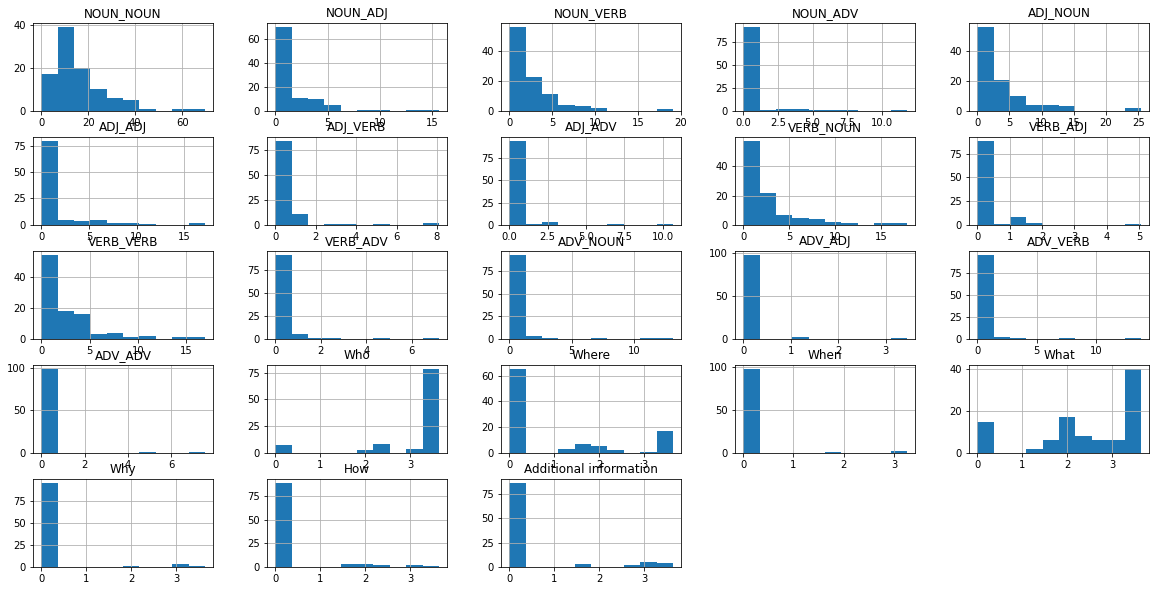

In [5]:
dataframe.hist(figsize=(20,10))
plt.show()

In [6]:
labels=['NOUN_NOUN',
 'NOUN_ADJ',
 'NOUN_VERB',
 'NOUN_ADV',
 'ADJ_NOUN',
 'ADJ_ADJ',
 'ADJ_VERB',
 'ADJ_ADV',
 'VERB_NOUN',
 'VERB_ADJ',
 'VERB_VERB',
 'VERB_ADV',
 'ADV_NOUN',
 'ADV_ADJ',
 'ADV_VERB',
 'ADV_ADV']

In [7]:
#sb.pairplot(dataframe.dropna(), hue='CLASS',size=4,vars=labels,kind='reg')

In [8]:
X = np.array(dataframe.drop(['CLASS'],1))
X_test = np.array(dataframe.drop(['CLASS'],1))
y = np.array(dataframe['CLASS'])
y_test =np.array(dataframe['CLASS'])
X.shape

/tmp/ipykernel_111796/1802400925.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(dataframe.drop(['CLASS'],1))
/tmp/ipykernel_111796/1802400925.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_test = np.array(dataframe.drop(['CLASS'],1))


(100, 23)

In [9]:
y_test

array(['entailment', 'entailment', 'contradiction', 'contradiction',
       'neutral', 'neutral', 'neutral', 'entailment', 'neutral',
       'entailment', 'neutral', 'contradiction', 'entailment',
       'contradiction', 'neutral', 'neutral', 'entailment',
       'contradiction', 'contradiction', 'entailment', 'entailment',
       'entailment', 'neutral', 'contradiction', 'entailment', 'neutral',
       'entailment', 'entailment', 'entailment', 'neutral', 'neutral',
       'contradiction', 'contradiction', 'entailment', 'contradiction',
       'neutral', 'entailment', 'neutral', 'neutral', 'entailment',
       'neutral', 'neutral', 'contradiction', 'neutral', 'entailment',
       'neutral', 'neutral', 'entailment', 'contradiction', 'neutral',
       'entailment', 'entailment', 'neutral', 'entailment',
       'contradiction', 'entailment', 'entailment', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'entailment',
       'entailment', 'contradiction', 'entailmen

In [10]:
y

array(['entailment', 'entailment', 'contradiction', 'contradiction',
       'neutral', 'neutral', 'neutral', 'entailment', 'neutral',
       'entailment', 'neutral', 'contradiction', 'entailment',
       'contradiction', 'neutral', 'neutral', 'entailment',
       'contradiction', 'contradiction', 'entailment', 'entailment',
       'entailment', 'neutral', 'contradiction', 'entailment', 'neutral',
       'entailment', 'entailment', 'entailment', 'neutral', 'neutral',
       'contradiction', 'contradiction', 'entailment', 'contradiction',
       'neutral', 'entailment', 'neutral', 'neutral', 'entailment',
       'neutral', 'neutral', 'contradiction', 'neutral', 'entailment',
       'neutral', 'neutral', 'entailment', 'contradiction', 'neutral',
       'entailment', 'entailment', 'neutral', 'entailment',
       'contradiction', 'entailment', 'entailment', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'entailment',
       'entailment', 'contradiction', 'entailmen

In [11]:
model = linear_model.LogisticRegression(penalty="l2", C=0.1)
model.fit(X,y)

/home/david/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.1)

In [12]:
model.get_params()

{'C': 0.1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [13]:
model.decision_function(X)

array([[ 3.14753214e-01,  7.52974533e-01, -1.06772775e+00],
       [-1.18450234e+00,  1.31425213e+00, -1.29749787e-01],
       [-5.53858200e-01,  4.40948128e-01,  1.12910073e-01],
       [ 2.39128570e-01,  2.82710132e-01, -5.21838702e-01],
       [-5.15249243e-01,  3.07209044e-01,  2.08040200e-01],
       [-2.22747264e-01,  7.15069981e-01, -4.92322717e-01],
       [-9.77825583e-01, -6.35817354e-01,  1.61364294e+00],
       [-9.67877581e-01,  6.47682911e-01,  3.20194669e-01],
       [-7.29793389e-01, -1.48734544e+00,  2.21713882e+00],
       [ 6.36574013e-01,  4.83602411e-01, -1.12017642e+00],
       [-7.13389174e-01,  1.37133421e-01,  5.76255752e-01],
       [ 8.38164502e-02,  2.94201428e-01, -3.78017879e-01],
       [-2.03724888e-01,  2.14806648e-01, -1.10817603e-02],
       [ 3.72398345e-01,  2.87290777e-01, -6.59689122e-01],
       [-5.60018738e-01, -2.62828953e-02,  5.86301633e-01],
       [-4.83326016e-01,  2.23428361e-01,  2.59897654e-01],
       [-9.06530917e-01,  1.83218052e+00

In [14]:
labels=['NOUN_NOUN',
 'NOUN_ADJ',
 'NOUN_VERB',
 'NOUN_ADV',
 'ADJ_NOUN',
 'ADJ_ADJ',
 'ADJ_VERB',
 'ADJ_ADV',
 'VERB_NOUN',
 'VERB_ADJ',
 'VERB_VERB',
 'VERB_ADV',
 'ADV_NOUN',
 'ADV_ADJ',
 'ADV_VERB',
 'ADV_ADV',
 'Who','Where','When','What','Why','How','Additional information']

In [15]:
model.classes_

array(['contradiction', 'entailment', 'neutral'], dtype=object)

In [16]:
contradiction=model.coef_[0]
entailment=model.coef_[1]
neutral=model.coef_[2]

In [17]:
print("Contradiction ",np.argmax(contradiction),labels[np.argmax(contradiction)],np.argmin(contradiction),labels[np.argmin(contradiction)])
print("Entailment ",np.argmax(entailment),labels[np.argmax(entailment)],np.argmin(entailment),labels[np.argmin(entailment)])
print("Neutral ",np.argmax(neutral),labels[np.argmax(neutral)],np.argmin(neutral),labels[np.argmin(neutral)])

Contradiction  3 NOUN_ADV 17 Where
Entailment  7 ADJ_ADV 20 Why
Neutral  20 Why 3 NOUN_ADV


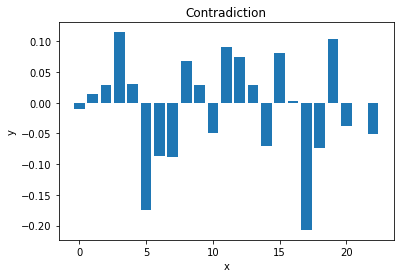

In [18]:
import matplotlib.pyplot as plt
import numpy as np

x_v = np.arange(0,23,1)
y_v = contradiction

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Contradiction')
plt.show()

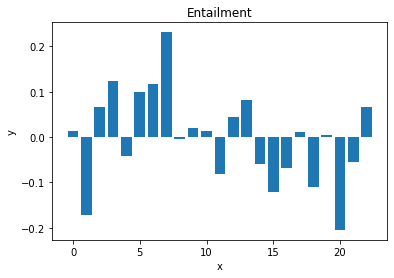

In [19]:
x_v = np.arange(0,23,1)
y_v = entailment

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Entailment')
plt.show()

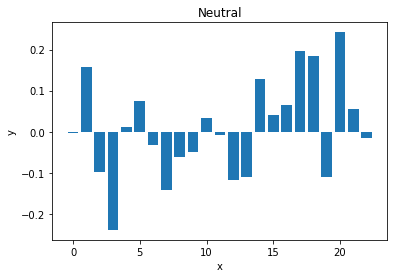

In [20]:
x_v = np.arange(0,23,1)
y_v = neutral

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Neutral')
plt.show()

In [21]:
predictions = model.predict(X)
print(predictions)

['entailment' 'entailment' 'entailment' 'entailment' 'entailment'
 'entailment' 'neutral' 'entailment' 'neutral' 'contradiction' 'neutral'
 'entailment' 'entailment' 'contradiction' 'neutral' 'neutral'
 'entailment' 'entailment' 'entailment' 'entailment' 'entailment'
 'contradiction' 'entailment' 'entailment' 'entailment' 'neutral'
 'contradiction' 'entailment' 'neutral' 'contradiction' 'entailment'
 'contradiction' 'entailment' 'entailment' 'entailment' 'neutral'
 'neutral' 'entailment' 'neutral' 'neutral' 'neutral' 'neutral'
 'contradiction' 'neutral' 'entailment' 'entailment' 'neutral'
 'contradiction' 'contradiction' 'neutral' 'entailment' 'entailment'
 'entailment' 'entailment' 'entailment' 'contradiction' 'entailment'
 'neutral' 'neutral' 'entailment' 'neutral' 'entailment' 'entailment'
 'entailment' 'entailment' 'entailment' 'entailment' 'entailment'
 'contradiction' 'entailment' 'entailment' 'entailment' 'entailment'
 'neutral' 'neutral' 'neutral' 'entailment' 'entailment' 'ent

In [22]:
y

array(['entailment', 'entailment', 'contradiction', 'contradiction',
       'neutral', 'neutral', 'neutral', 'entailment', 'neutral',
       'entailment', 'neutral', 'contradiction', 'entailment',
       'contradiction', 'neutral', 'neutral', 'entailment',
       'contradiction', 'contradiction', 'entailment', 'entailment',
       'entailment', 'neutral', 'contradiction', 'entailment', 'neutral',
       'entailment', 'entailment', 'entailment', 'neutral', 'neutral',
       'contradiction', 'contradiction', 'entailment', 'contradiction',
       'neutral', 'entailment', 'neutral', 'neutral', 'entailment',
       'neutral', 'neutral', 'contradiction', 'neutral', 'entailment',
       'neutral', 'neutral', 'entailment', 'contradiction', 'neutral',
       'entailment', 'entailment', 'neutral', 'entailment',
       'contradiction', 'entailment', 'entailment', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'entailment',
       'entailment', 'contradiction', 'entailmen

In [23]:
X

array([[23.18277657,  0.        ,  8.16802084, ...,  0.        ,
         0.        ,  0.        ],
       [22.94202816,  1.59155118,  2.13499045, ...,  0.        ,
         0.        ,  3.63758616],
       [14.88061917,  1.82459164,  3.68787432, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 5.29783893,  0.        ,  5.13886273, ...,  0.        ,
         0.        ,  0.        ],
       [ 7.11044979,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [12.45881259,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [24]:
model.score(X,y)

0.55

In [25]:
validation_size = 0.10
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, y, test_size=validation_size)

In [26]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)

Logistic Regression: 0.388889 (0.089581)


/home/david/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/david/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
 

In [27]:
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))

0.7


In [28]:
print(confusion_matrix(Y_validation, predictions))

[[0 1 0]
 [0 4 0]
 [0 2 3]]


In [29]:
print(classification_report(Y_validation, predictions))

               precision    recall  f1-score   support

contradiction       0.00      0.00      0.00         1
   entailment       0.57      1.00      0.73         4
      neutral       1.00      0.60      0.75         5

     accuracy                           0.70        10
    macro avg       0.52      0.53      0.49        10
 weighted avg       0.73      0.70      0.67        10



/home/david/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/david/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/david/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
#X_new = pd.DataFrame()
#model.predict(X_new)